Chapter 20
# 三种天气状况，随机行走
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_markov_chain(T, initial_state, num_steps):

    states = [initial_state]  
    # 初始状态
    
    current_state = initial_state
    
    for _ in range(num_steps):
        # 根据当前状态和转移矩阵决定下一状态
        next_state = np.random.choice(np.arange(len(T)), 
                                      p=T[current_state])
        states.append(next_state)
        current_state = next_state
        
    states = np.array(states)
    return states

In [3]:
# 定义转移矩阵
T = np.array([[0.70, 0.45, 0.55],  
              [0.25, 0.30, 0.30],
              [0.05, 0.25, 0.15]]) 

# 模拟马尔科夫链
initial_state = 0  # 假设初始状态为 0
num_steps = 300    # 假设模拟步数
states = simulate_markov_chain(T.T, initial_state, num_steps)

indices = np.arange(num_steps + 1)
labels = ["Sun", "Cloud", "Rain"]

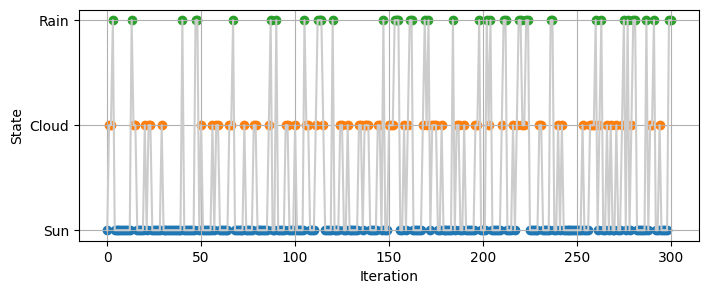

In [9]:
plt.figure(figsize=(8, 3))
plt.plot(indices, states, c = '0.8')

for state_i,label_i in zip([0, 1, 2],labels):
    plt.scatter(indices[states == state_i], 
                states[states == state_i],
                label=label_i)
# plt.legend()
plt.xlabel('Iteration')
plt.ylabel('State')
plt.yticks([0, 1, 2], labels)
plt.grid(True)
plt.savefig('马尔科夫链随机行走.svg')

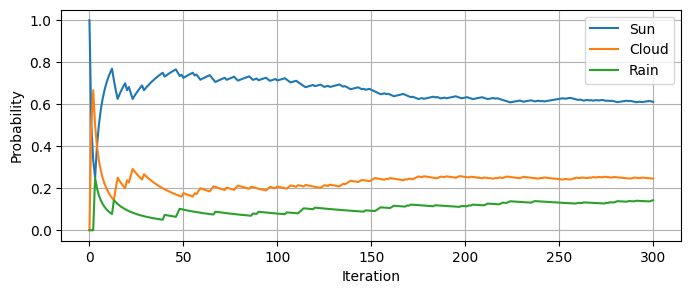

In [10]:
# 计算0, 1, 2的累积出现频率
cumulative_counts = np.cumsum(np.eye(3)[states], axis=0)
cumulative_probs = cumulative_counts / np.arange(1, len(states) + 1).reshape(-1, 1)

# 绘制累积概率随时间的变化图
plt.figure(figsize=(8, 3))
plt.plot(cumulative_probs, label=labels)

plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.savefig('累积概率曲线.svg')
plt.show()


In [15]:
prob_list = counts_list/num_steps
prob_list

array([0.61333333, 0.24666667, 0.14333333])

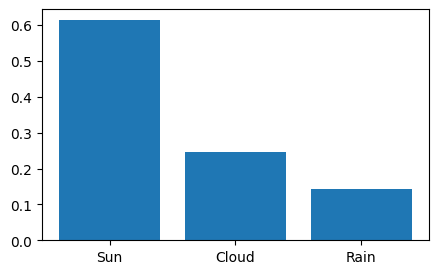

In [14]:
states_list, counts_list = np.unique(states, return_counts=True)

plt.figure(figsize=(5, 3))
plt.bar(states_list,prob_list)
plt.xticks(states_list)
plt.xticks([0, 1, 2], labels)
plt.savefig('最终结果.svg')